In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Loading

In [9]:
_data = load_diabetes()
data = _data['data']
feature_names = _data['feature_names']

df = pd.DataFrame(data, columns=feature_names)
df['target'] = _data['target']

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


# Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
_df_scaled = scaler.fit_transform(df.drop(["target"], axis=1))
df_scaled = pd.DataFrame(_df_scaled, columns=feature_names)
df_scaled["target"] = df["target"]

df_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.8005,1.0655,1.2971,0.4598,-0.9297,-0.7321,-0.9125,-0.0545,0.4185,-0.3710,151.0000
1,-0.0396,-0.9385,-1.0822,-0.5535,-0.1776,-0.4029,1.5644,-0.8303,-1.4366,-1.9385,75.0000
2,1.7933,1.0655,0.9345,-0.1192,-0.9587,-0.7189,-0.6802,-0.0545,0.0602,-0.5452,141.0000
3,-1.8724,-0.9385,-0.2438,-0.7706,0.2563,0.5254,-0.7576,0.7213,0.4770,-0.1968,206.0000
4,0.1132,-0.9385,-0.7649,0.4598,0.0827,0.3279,0.1712,-0.0545,-0.6725,-0.9806,135.0000


In [ ]:
df_scaled.describe()

dd


<Axes: >

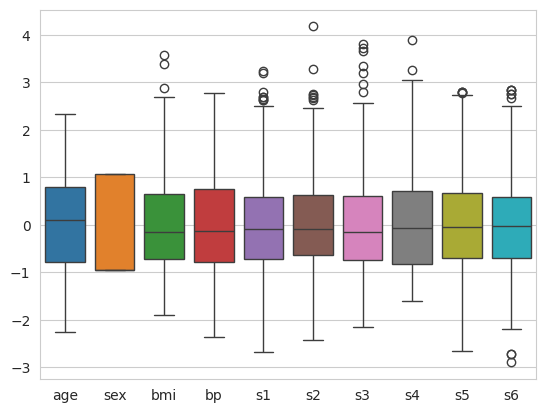

In [13]:
sns.boxplot(data=df_scaled.drop("target", axis=1))

# EDA
## Correlation

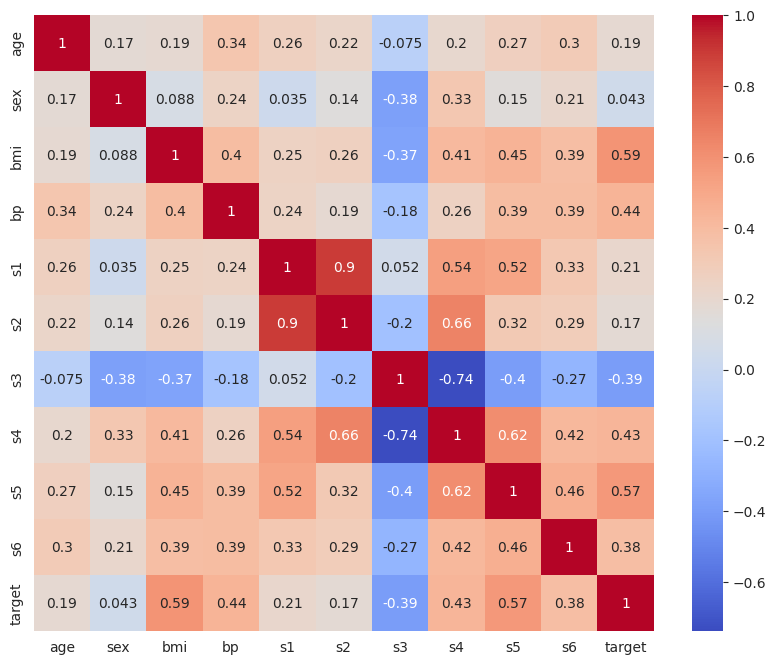

In [14]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    data=df_scaled.corr(),
    annot=True,
    cmap="coolwarm",
)

plt.show()

In [15]:
# s1 - s2 : 다중공선성
df_scaled_ = df_scaled.drop(["s2"], axis=1)
df_scaled_.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6,target
0,0.8005,1.0655,1.2971,0.4598,-0.9297,-0.9125,-0.0545,0.4185,-0.3710,151.0000
1,-0.0396,-0.9385,-1.0822,-0.5535,-0.1776,1.5644,-0.8303,-1.4366,-1.9385,75.0000
2,1.7933,1.0655,0.9345,-0.1192,-0.9587,-0.6802,-0.0545,0.0602,-0.5452,141.0000
3,-1.8724,-0.9385,-0.2438,-0.7706,0.2563,-0.7576,0.7213,0.4770,-0.1968,206.0000
4,0.1132,-0.9385,-0.7649,0.4598,0.0827,0.1712,-0.0545,-0.6725,-0.9806,135.0000


# Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

## Dataset Definition

In [17]:
X = df_scaled_.drop("target", axis=1)
y = df_scaled_["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
print(
    len(df_scaled_), 
    len(X_train), 
    len(X_test)
)

442 353 89


In [12]:
print(353 + 89, 353 / 442)

442 0.7986425339366516


In [13]:
X_train.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6
17,1.4878,1.0655,0.2547,1.1837,0.7191,-0.8350,0.7213,0.5753,-0.0227
66,-0.1923,1.0655,-0.3797,-0.6983,-0.4380,-1.5317,1.4971,0.0057,0.4128
137,0.1132,-0.9385,1.0478,2.0522,-0.3223,-0.1384,-0.0545,0.3582,-0.2839
245,-0.5742,-0.9385,-0.7423,-0.6259,-1.1901,0.6356,-0.8303,-1.0485,-2.7222
31,-0.4978,-0.9385,-1.3768,-1.7116,-0.8140,1.2548,-1.6061,-0.7806,-0.8935


In [14]:
y_train.head()

17    144.0000
66    150.0000
137   280.0000
245   125.0000
31     59.0000
Name: target, dtype: float64

## Model 

[Reference] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.score(X_train, y_train)

0.5251250434558368

In [17]:
print(
    model.intercept_,
    model.coef_,
)

151.301003175048 [  2.05391657 -11.48109506  26.43241741  16.39320462 -15.06603356
  -3.86826571  11.47192955  23.43878639   2.52107534]


In [18]:
X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

## Data Processing

- sex, s1, s3 : 회귀계수 음수 
- age, s6 : 낮은 회귀계수

In [19]:
df_scaled_ = df_scaled_.drop(["sex", "s1", "s3", "age", "s6"], axis=1)
df_scaled_.head()

,bmi,bp,s4,s5,target
0,1.2971,0.4598,-0.0545,0.4185,151.0000
1,-1.0822,-0.5535,-0.8303,-1.4366,75.0000
2,0.9345,-0.1192,-0.0545,0.0602,141.0000
3,-0.2438,-0.7706,0.7213,0.4770,206.0000
4,-0.7649,0.4598,-0.0545,-0.6725,135.0000


<Axes: >

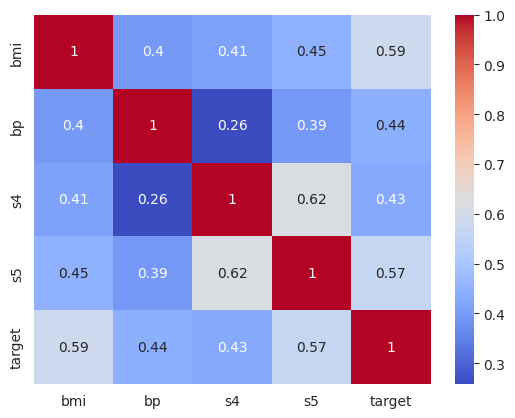

In [20]:
sns.heatmap(
    df_scaled_.corr(),
    annot=True,
    cmap="coolwarm",
)

## Retraining

In [21]:
X = df_scaled_.drop("target", axis=1)
y = df_scaled_["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print(
    model.score(X_train, y_train),
    model.intercept_,
    model.coef_,
)

0.4849585970227177 151.72480629304863 [30.0592845  13.81014968  4.30293136 21.05830148]


In [24]:
X_train.columns

Index(['bmi', 'bp', 's4', 's5'], dtype='object')

* Formula *

y = 151.73 + 30.06*bmi + 13.81*bp + 4.30*s4 + 21.06*s5

- bmi : body mass index
- bp : average blood pressure
- s4 : total cholesterol / HDL
- s5 : possibly log of serum triglycerides level

## Prediction

In [26]:
pred = model.predict(X_test)

In [27]:
print(
    r2_score(y_test, pred),
    mean_squared_error(y_test, pred),
    mean_absolute_percentage_error(y_test, pred),
)

0.4525840776044412 2900.292626405858 0.39011182592350474


In [28]:
df_pred = pd.DataFrame(
    {
        "y_test": y_test,
        "pred": pred,
    }
)

df_pred["gap"] = abs(df_pred["y_test"] - df_pred["pred"])

df_pred.head()

,y_test,pred,gap
287,219.0000,160.6200,58.3800
211,70.0000,167.8574,97.8574
72,202.0000,182.6916,19.3084
321,230.0000,264.0566,34.0566
73,111.0000,139.1285,28.1285


In [29]:
df_pred.sort_values("gap", ascending=False).head()

,y_test,pred,gap
56,52.0000,185.2944,133.2944
77,200.0000,70.7173,129.2827
78,252.0000,127.2212,124.7788
9,310.0000,196.5218,113.4782
218,214.0000,104.9129,109.0871


In [30]:
df_pred.sort_values("gap", ascending=True).head()

,y_test,pred,gap
409,181.0000,180.7170,0.2830
422,233.0000,234.0507,1.0507
76,170.0000,171.9907,1.9907
370,63.0000,67.8112,4.8112
281,94.0000,88.4493,5.5507


In [2]:
plt.scatter(X_test["bmi"], y_test, alpha=0.5, color="blue")
plt.scatter(X_test["bmi"], pred, alpha=0.5, color="red")

plt.title("Linear Regression Results")
plt.xlabel("bmi(scaled)")
plt.ylabel("target")
plt.show()

NameError: name 'plt' is not defined

----
** End of Documents ** 